In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import mpl_lego as mplego

from functools import partial
from pyprojroot import here
from mpl_lego.labels import bold_text, add_significance_label
from scipy.stats import bootstrap, mannwhitneyu

%matplotlib inline

In [2]:
mplego.style.use_latex_style()

In [4]:
df = pd.read_csv(here('data/aita_final.csv'))

In [5]:
obs_yta_gpt_yta = df[(df['true_label'] == 'YTA') & (df['gpt_label_3'] == 'YTA')]
obs_nta_gpt_yta = df[(df['true_label'] == 'YTA') & (df['gpt_label_3'] == 'NTA')]
obs_nta_gpt_esh = df[(df['true_label'] == 'NTA') & (df['gpt_label_3'] == 'ESH')]
obs_esh_gpt_esh = df[(df['true_label'] == 'ESH') & (df['gpt_label_3'] == 'ESH')]

In [6]:
probs = ['care_p', 'fairness_p', 'loyalty_p', 'authority_p', 'sanctity_p']
labels = ['Care', 'Fairness', 'Loyalty', 'Authority', 'Sanctity']

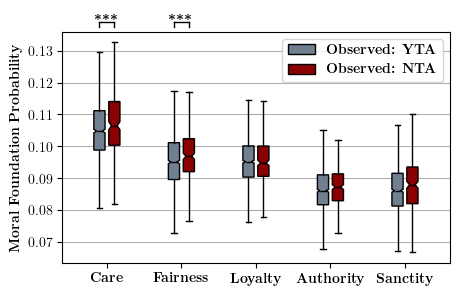

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

bp1 = ax.boxplot(
    [obs_yta_gpt_yta[prob] for prob in probs],
    patch_artist=True,
    notch=True,
    widths=0.15,
    positions=[idx + 0.4 for idx in range(5)],
    boxprops={'facecolor': 'slategrey'},
    medianprops={'linewidth': 1, 'color': 'black'},
    showfliers=False)
bp2 = ax.boxplot(
    [obs_nta_gpt_yta[prob] for prob in probs],
    patch_artist=True,
    notch=True,
    widths=0.15,
    positions=[idx + 0.6 for idx in range(5)],
    boxprops={'facecolor': 'darkred'},
    medianprops={'linewidth': 1, 'color': 'black'},
    showfliers=False)
    
ax.set_xticks(0.5 + np.arange(5))
ax.set_xticklabels(bold_text(labels))
ax.legend([bp1["boxes"][0], bp2["boxes"][0]],
          [bold_text('Observed: YTA'),
           bold_text('Observed: NTA')], loc='upper right')
ax.grid(axis='y')
ax.set_axisbelow(True)
add_significance_label(ax,
                       bounds=[0.4, 0.6],
                       label=bold_text('***'),
                       spacing=0.02,
                       fontsize=10,
                       width=0.025)
add_significance_label(ax,
                       bounds=[1.4, 1.6],
                       label=bold_text('***'),
                       spacing=0.02,
                       fontsize=10,
                       width=0.025)

ax.set_ylabel(bold_text('Moral Foundation Probability'))
plt.savefig('figure3.pdf', bbox_inches='tight')

Text(0, 0.5, '\\textbf{Moral Foundation Probability}')

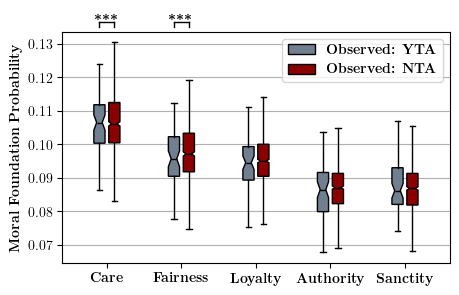

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

bp1 = ax.boxplot(
    [obs_esh_gpt_esh[prob] for prob in probs],
    patch_artist=True,
    notch=True,
    widths=0.15,
    positions=[idx + 0.4 for idx in range(5)],
    boxprops={'facecolor': 'slategrey'},
    medianprops={'linewidth': 1, 'color': 'black'},
    showfliers=False)
bp2 = ax.boxplot(
    [obs_nta_gpt_esh[prob] for prob in probs],
    patch_artist=True,
    notch=True,
    widths=0.15,
    positions=[idx + 0.6 for idx in range(5)],
    boxprops={'facecolor': 'darkred'},
    medianprops={'linewidth': 1, 'color': 'black'},
    showfliers=False)
    
ax.set_xticks(0.5 + np.arange(5))
ax.set_xticklabels(bold_text(labels))
ax.legend([bp1["boxes"][0], bp2["boxes"][0]],
          [bold_text('Observed: YTA'),
           bold_text('Observed: NTA')], loc='upper right')
ax.grid(axis='y')
ax.set_axisbelow(True)
add_significance_label(ax,
                       bounds=[0.4, 0.6],
                       label=bold_text('***'),
                       spacing=0.02,
                       fontsize=10,
                       width=0.025)
add_significance_label(ax,
                       bounds=[1.4, 1.6],
                       label=bold_text('***'),
                       spacing=0.02,
                       fontsize=10,
                       width=0.025)

ax.set_ylabel(bold_text('Moral Foundation Probability'))

In [19]:
[mannwhitneyu(obs_esh_gpt_esh[prob], obs_nta_gpt_esh[prob]) for prob in probs]

[MannwhitneyuResult(statistic=25523.0, pvalue=0.8045158412626733),
 MannwhitneyuResult(statistic=23391.0, pvalue=0.1875498330211457),
 MannwhitneyuResult(statistic=24892.0, pvalue=0.5725527188252033),
 MannwhitneyuResult(statistic=24141.0, pvalue=0.34653575665556036),
 MannwhitneyuResult(statistic=26690.0, pvalue=0.7354575940354271)]